In [5]:
# 导入数据
import json

with open('hw4_data.json', 'r') as f:
    data = json.load(f)

nodes = data['nodes']
edges = data['edges']
persons = {}
i = 0
for node in nodes:
    persons[node[0]] = i
    i += 1

# 设置邻接矩阵
A = [[0 for _ in range(31)] for _ in range(31)]
for edge in edges:
    A[persons[edge[0]]][persons[edge[1]]] = 1
    A[persons[edge[1]]][persons[edge[0]]] = 1

for row in A:
    print(row)

# 找出直接朋友
friends = {}
persons_list = list(persons.keys())
for i in range(len(persons_list)):
    friends[persons_list[i]] = []
    for j in range(len(persons_list)):
        if A[i][j] == 1:
            friends[persons_list[i]].append(persons_list[j])

print(friends)


[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [6]:
# 计算每个用户的度数，列出最大的五个
friend_numbers = [0] * 31
for i in range(31):
    friend_numbers[i] = len(friends[persons_list[i]])

indexed_nums = [(value, index) for index, value in enumerate(friend_numbers)]
sorted_nums = sorted(indexed_nums, key=lambda x: x[0], reverse=True)
top_five = sorted_nums[:5]

print('度数最大的前5个用户：')
for p in top_five:
    print(f"{persons_list[p[1]]} : {p[0]}")

# 影响力最高的前5个用户
print("影响力最高的前5个用户：")
for node in nodes[:5]:
    print(f"{node[0]}: {node[1]}")
influence_list = [0] * 31
for i in range(31):
    influence_list[i] = nodes[i][1]

# 最有影响力的前5个用户
overall_score = [0] * 31
for i in range(31):
    overall_score[i] = influence_list[i]*0.6 + friend_numbers[i]*0.4

indexed_nums = [(value, index) for index, value in enumerate(overall_score)]
sorted_nums = sorted(indexed_nums, key=lambda x: x[0], reverse=True)
top_five = sorted_nums[:5]

print('综合影响力最大的前5个用户：')
for p in top_five:
    print(f"{persons_list[p[1]]} : {p[0]}")


度数最大的前5个用户：
tyn1998 : 30
frank-zsy : 30
pomelo-nwu : 24
andyhuang18 : 23
wj23027 : 23
影响力最高的前5个用户：
Yanyan-Wang: 50.95
Aarebecca: 23.82
pomelo-nwu: 22.36
tyn1998: 16.64
frank-zsy: 15.8
综合影响力最大的前5个用户：
Yanyan-Wang : 36.17
pomelo-nwu : 23.016
tyn1998 : 21.984
frank-zsy : 21.48
Aarebecca : 18.692


In [8]:
# 推荐新朋友
yanyan_friends = set(friends['Yanyan-Wang'])

max = 0
p_friend = ''
for friend in yanyan_friends:
    f_friends = set(friends[friend])
    for f_friend in f_friends:
        ff_friends = set(friends[f_friend])
        if len(ff_friends & yanyan_friends) > max and f_friend not in yanyan_friends and f_friend != 'Yanyan-Wang':
            max = len(ff_friends & yanyan_friends)
            p_friend = f_friend

print(f"最有可能成为新朋友的是：{p_friend}") # 推荐理由：共同朋友最多

# 与 Yanyan-Wang 连接强度最高的5个用户


最有可能成为新朋友的是：Zzzzzhuzhiwei


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

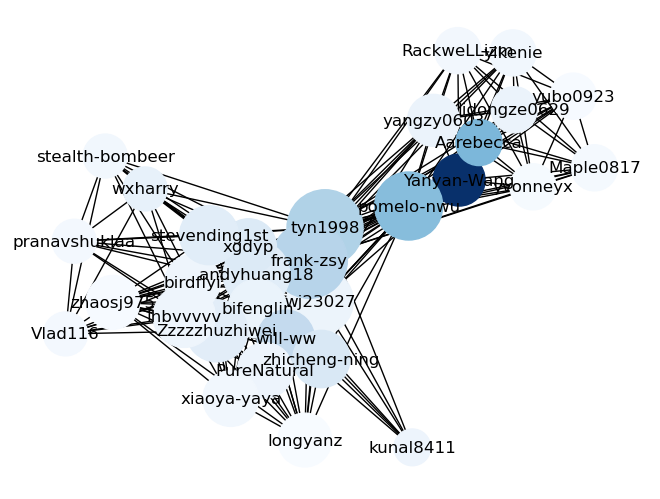

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
network = {}
for user, score in nodes:
    network[user] = []

for user1, user2, weight in edges:
    network[user1].append((user2, weight))
    network[user2].append((user1, weight))  # 因为是无向图

degree = {user: len(friends) for user, friends in network.items()}
influence_scores = {user: score for user, score in nodes}
G = nx.Graph()
for user, friends in network.items():
    for friend, weight in friends:
        G.add_edge(user, friend, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=[degree[user] * 100 for user in G.nodes()],
        node_color=[influence_scores[user] for user in G.nodes()], cmap=plt.cm.Blues)
plt.colorbar()
plt.show()